Classification: https://wandb.ai/philliplakaschus/grokking/runs/fsiagb6p?nw=nwuserphilliplakaschus

Seq2Seq: https://wandb.ai/philliplakaschus/grokking/runs/037zy55b?nw=nwuserphilliplakaschus

In [26]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
api = wandb.Api()

In [44]:
def create_plot(classification_history_df, seq2seq_history_df):
    # Create figure with specific size and DPI
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(12, 7), dpi=150)
    
    # Plot classification data (red)
    ax.plot(classification_history_df.index, classification_history_df['training/accuracy'], 
            color='#ff4b5c', linewidth=2, label='Classification - Training')
    ax.plot(classification_history_df.index, classification_history_df['validation_in_domain/accuracy'], 
            color='#ff4b5c', linewidth=2, linestyle='--', label='Classification - Validation')
    
    # Plot seq2seq data (blue)
    ax.plot(seq2seq_history_df.index, seq2seq_history_df['training/accuracy'], 
            color='#4b7bec', linewidth=2, label='Seq2Seq - Training')
    ax.plot(seq2seq_history_df.index, seq2seq_history_df['validation_in_domain/accuracy'], 
            color='#4b7bec', linewidth=2, linestyle='--', label='Seq2Seq - Validation')
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7, color='#cccccc')
    
    # Customize background
    ax.set_facecolor('#f8f9fa')
    fig.patch.set_facecolor('#ffffff')
    
    # Set labels and title
    ax.set_xlabel('Optimization Steps', fontsize=12, fontweight='bold')
    ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax.set_title('Training and Validation Accuracy Comparison\nClassification vs Seq2Seq Models', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Customize legend
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
             borderaxespad=0, frameon=True, fancybox=True, 
             shadow=True, fontsize=10)
    
    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Format x-axis to show fewer tick labels and use scientific notation for large numbers
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    # Set y-axis limits with a small padding
    ax.set_ylim(-0.05, 1.05)
    
    # Add light horizontal lines at important accuracy levels
    for y in [0.25, 0.5, 0.75]:
        ax.axhline(y=y, color='gray', linestyle=':', alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig, ax

In [23]:
keys=["validation_in_domain/accuracy", "validation_in_domain/loss", "training/accuracy", "training/loss"]

## Standard Addition

In [ ]:
classification_run = "philliplakaschus/grokking/fsiagb6p"
seq2seq_run = "philliplakaschus/grokking/037zy55b"

In [19]:
classification_run = api.run(classification_run)
classification_history = classification_run.scan_history(keys=keys)

In [20]:
pd.DataFrame(classification_history)

,validation_in_domain/accuracy,validation_in_domain/loss,training/accuracy,training/loss
0,0.010742,5.396837,0.007812,5.513813
1,0.009277,5.138037,0.017578,5.188176
2,0.014648,4.991015,0.017578,4.989163
3,0.010742,4.879390,0.029297,4.821452
4,0.008789,4.826231,0.019531,4.754261
...,...,...,...,...
2495,0.997070,0.044253,1.000000,0.015498
2496,0.997070,0.043913,1.000000,0.015084
2497,0.997070,0.043297,1.000000,0.014912
2498,0.997070,0.043063,1.000000,0.014801


In [21]:
seq2seq_run = api.run(seq2seq_run)
seq2seq_history = seq2seq_run.scan_history(keys=keys)

In [22]:
pd.DataFrame(seq2seq_history)

,validation_in_domain/accuracy,validation_in_domain/loss,training/accuracy,training/loss
0,0.527182,1.345784,0.441402,1.519112
1,0.718923,0.817944,0.718949,0.910889
2,0.721325,0.620217,0.715312,0.667235
3,0.727963,0.529234,0.730856,0.545093
4,0.751324,0.496277,0.744522,0.510828
...,...,...,...,...
2495,0.965568,0.097857,0.998940,0.014454
2496,0.965053,0.097238,0.998031,0.015011
2497,0.965272,0.098053,0.998481,0.012924
2498,0.965916,0.096831,0.998791,0.012592


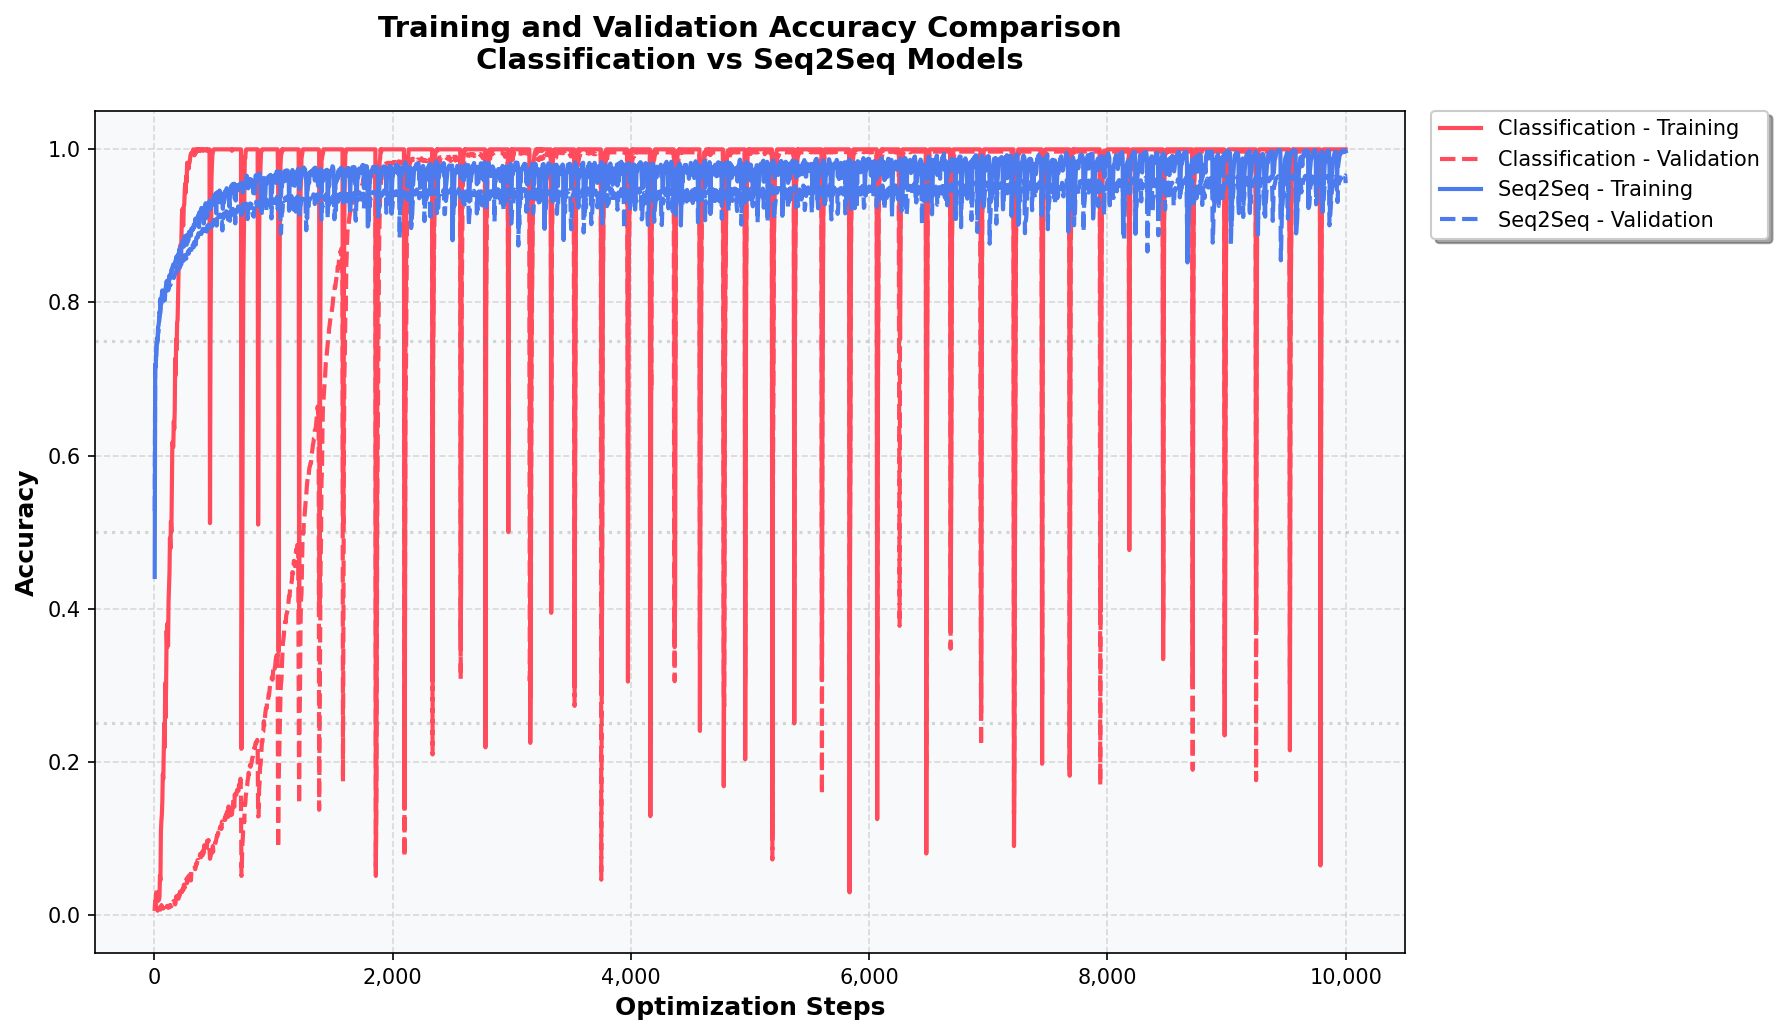

In [45]:
# Get the histories with steps
classification_steps = pd.DataFrame([step for step in classification_run.scan_history(['Optimization Steps'] + keys)])
seq2seq_steps = pd.DataFrame([step for step in seq2seq_run.scan_history(['Optimization Steps'] + keys)])

# Create DataFrames with steps as index
classification_df = pd.DataFrame({
    'training/accuracy': classification_steps['training/accuracy'].values,
    'validation_in_domain/accuracy': classification_steps['validation_in_domain/accuracy'].values
}, index=classification_steps['Optimization Steps'])

seq2seq_df = pd.DataFrame({
    'training/accuracy': seq2seq_steps['training/accuracy'].values,
    'validation_in_domain/accuracy': seq2seq_steps['validation_in_domain/accuracy'].values
}, index=seq2seq_steps['Optimization Steps'])

# Create and display the plot
fig, ax = create_plot(classification_df, seq2seq_df)
plt.show()

In [43]:
seq2seq_df

,training/accuracy,validation_in_domain/accuracy
Optimization Steps,,
4,0.441402,0.527182
8,0.718949,0.718923
12,0.715312,0.721325
16,0.730856,0.727963
20,0.744522,0.751324
...,...,...
9984,0.998940,0.965568
9988,0.998031,0.965053
9992,0.998481,0.965272
